<a href="https://colab.research.google.com/github/BenyaminZojaji/Deep_Learning/blob/main/17Flowers-classification/17Flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sn

### Data

In [17]:
train_dataset_path = '/content/drive/MyDrive/Dataset/Flowers/Train'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=10,
    validation_split=0.2
)

train_data = idg.flow_from_directory(
    train_dataset_path,
    target_size=(width, height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='training'
)

val_data = idg.flow_from_directory(
    train_dataset_path,
    target_size=(width, height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation'
)

Found 884 images belonging to 17 classes.
Found 204 images belonging to 17 classes.


### Visualization

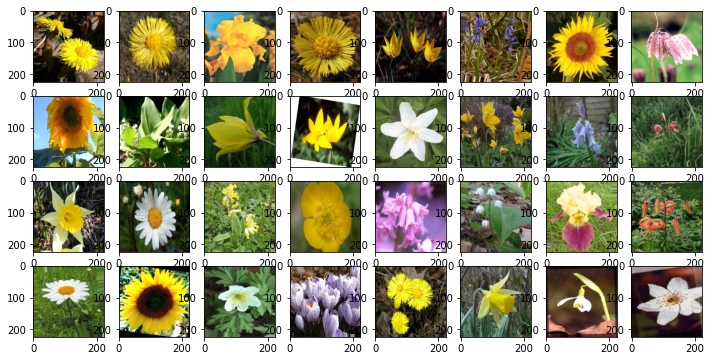

In [10]:
some_images = next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(12,6))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])

### Model

In [25]:
base_model = tf.keras.applications.ResNet50V2(
    weights="imagenet",
    input_shape=(width,height,3),
    include_top=False,
    pooling='avg')

In [26]:
base_model.trainable = False

In [27]:
model = tf.keras.models.Sequential([
    base_model,
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(17, activation="softmax")
])

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [29]:
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
28/28 [==============================] - 31s 973ms/step - loss: 1.5373 - accuracy: 0.5317 - val_loss: 0.5632 - val_accuracy: 0.8480
Epoch 2/10
28/28 [==============================] - 25s 902ms/step - loss: 0.5011 - accuracy: 0.8450 - val_loss: 0.3088 - val_accuracy: 0.9069
Epoch 3/10
28/28 [==============================] - 25s 892ms/step - loss: 0.2711 - accuracy: 0.9197 - val_loss: 0.3761 - val_accuracy: 0.9069
Epoch 4/10
28/28 [==============================] - 25s 887ms/step - loss: 0.1926 - accuracy: 0.9434 - val_loss: 0.3437 - val_accuracy: 0.9069
Epoch 5/10
28/28 [==============================] - 25s 880ms/step - loss: 0.1379 - accuracy: 0.9615 - val_loss: 0.4252 - val_accuracy: 0.8971
Epoch 6/10
28/28 [==============================] - 25s 885ms/step - loss: 0.1106 - accuracy: 0.9672 - val_loss: 0.2933 - val_accuracy: 0.9265
Epoch 7/10
28/28 [==============================] - 25s 880ms/step - loss: 0.1036 - accuracy: 0.9717 - val_loss: 0.3318 - val_accuracy: 0.8922

In [ ]:
model.save('resnet50v2-17flowers.h5')

In [30]:
test_dataset_path = '/content/drive/MyDrive/Dataset/Flowers/Test'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
)

test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size=(width, height),
    class_mode='categorical',
    batch_size=batch_size,
)

Found 272 images belonging to 17 classes.


In [32]:
model.evaluate(test_data)

9/9 [==============================] - 3s 296ms/step - loss: 0.5169 - accuracy: 0.8419


[0.5169324278831482, 0.841911792755127]

### Confusion Matrix

In [33]:
Y_pred = []

for path in test_data.filepaths:
  try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (width, height))
    img = img / 255
    img = img.reshape(1, width, height, 3)
    Y_pred.append(np.argmax(model.predict(img)))
  except:
    print(path)#if image isn't readable

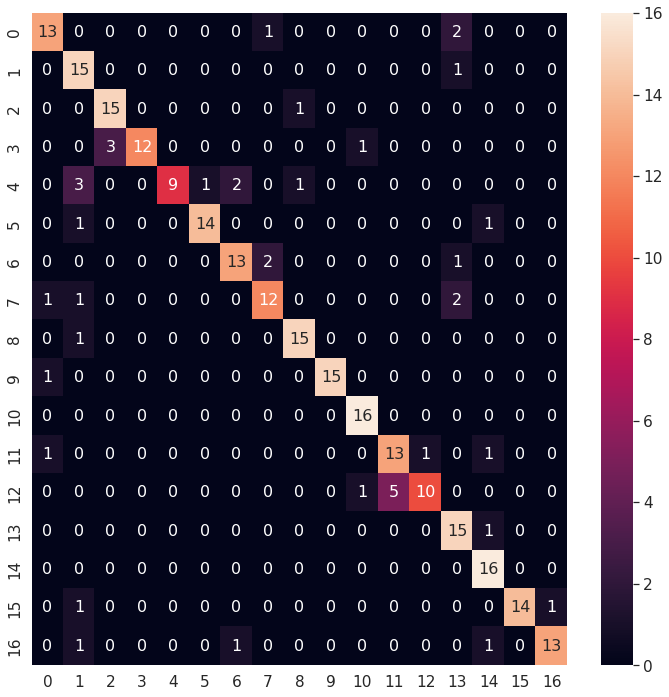

In [39]:
conf_mat = confusion_matrix(test_data.classes, Y_pred)
plt.figure(figsize = (12,12))
sn.set(font_scale=1.4) # for label size
sn.heatmap(conf_mat, annot=True, annot_kws={"size": 16})
plt.show()